**Problem Statement**
Using ML we will try to predict salary of datascientist from job posting.

# Step 1: Importing Data in Python:


In [419]:
import numpy as np
import pandas as pd

Job_Post = pd.read_csv("Job_Posting.csv")

Job_Post.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


# Step 2. Understanding the target variable: 
#### here the target variable is salary estimate

In [420]:
Job_Post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


# Step 3 Data Cleaning

In [421]:
Data_For_ML = pd.DataFrame()
Job_Post.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [422]:
Job_Post.shape

(956, 15)

In [423]:
Job_Post.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [424]:
Job_Post.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [425]:
Job_Post.nunique()


Unnamed: 0           956
Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64

In [426]:
Job_Post['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

In [427]:
Job_Post = Job_Post[Job_Post['Salary Estimate']!= '-1']
Job_Post['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoor est.

In [428]:
Job_Post['Salary Estimate'] = Job_Post['Salary Estimate'].apply(lambda x: x.split('(')[0])
Job_Post['Salary Estimate'] = Job_Post['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))
Job_Post['Salary Estimate'].unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '117-2

In [429]:
Data_For_ML['Per_Hour_Salary'] = Job_Post['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
Data_For_ML['Employer_Salary'] = Job_Post['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)


In [430]:
Data_For_ML.Per_Hour_Salary.value_counts()

Per_Hour_Salary
0    718
1     24
Name: count, dtype: int64

In [431]:
Data_For_ML.Employer_Salary.value_counts()

Employer_Salary
0    725
1     17
Name: count, dtype: int64

In [432]:
Job_Post['Salary Estimate'] = Job_Post['Salary Estimate'].apply(lambda x: x.lower().replace('per hour', ''))
Job_Post['Salary Estimate'] = Job_Post['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary:', ''))
Job_Post['Salary Estimate'].unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ', '93-149 ',
       '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ', '74-138 ',
       '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160', '158-211 ',
       '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ',
       '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ',
       '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ',
       '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ',
       '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ',
       '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ',
       '34-62 ', '117-231 ', '79-134 ', '52-93 ', '55-1

In [433]:
Data_For_ML['Min_Salary'] = Job_Post['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
Data_For_ML['Max_Salary'] = Job_Post['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

Converting Per Hour Salary to Annual: multiply by 40 hours and 52 weeks

In [434]:
Data_For_ML['Min_Salary'] = Data_For_ML.apply(lambda x: x.Min_Salary*40*52*0.001 if x.Per_Hour_Salary==1 else x.Min_Salary, axis =1)

Data_For_ML['Max_Salary'] = Data_For_ML.apply(lambda x: x.Max_Salary*40*52*0.001 if x.Per_Hour_Salary==1 else x.Max_Salary, axis =1)


In [435]:
Data_For_ML.Min_Salary.unique()

array([ 53.  ,  63.  ,  80.  ,  56.  ,  86.  ,  71.  ,  54.  ,  38.  ,
       120.  , 126.  ,  64.  , 106.  ,  46.  ,  83.  , 102.  ,  67.  ,
       118.  , 110.  ,  81.  ,  73.  , 109.  ,  75.  ,  34.  ,  72.  ,
        93.  ,  85.  ,  77.  ,  82.  , 115.  ,  74.  ,  68.  ,  52.  ,
       150.  , 158.  ,  20.  ,  41.  , 111.  ,  84.  , 107.  ,  49.  ,
        61.  ,  88.  ,  60.  ,  96.  ,  65.  , 139.  ,  50.  ,  99.  ,
        79.  ,  57.  ,  94.  ,  37.  , 100.  ,  55.  ,  39.  ,  31.  ,
       117.  ,  40.  ,  89.  , 200.  , 121.  ,  76.  ,  91.  ,  95.  ,
        43.  ,  29.  ,  26.  , 112.  ,  51.  , 113.  ,  59.  ,  44.  ,
       124.  , 131.  , 132.  ,  35.36,  42.  , 116.  ,  48.  , 105.  ,
        98.  ,  43.68, 114.  , 108.  ,  90.  , 138.  , 190.  ,  35.  ,
        37.44,  69.  ,  66.  ,  31.2 ,  33.  ,  62.  ,  15.  , 127.  ,
        78.  ,  45.  ,  70.  , 130.  ,  92.  ,  36.  ,  97.  ,  49.92,
       202.  ,  32.  ,  87.  , 101.  , 125.  ,  20.8 ,  47.  , 176.  ,
      

In [436]:
Data_For_ML.Max_Salary.unique()

array([ 91.  , 112.  ,  90.  ,  97.  , 143.  , 119.  ,  93.  , 142.  ,
        84.  , 160.  , 201.  , 106.  , 172.  ,  85.  , 144.  , 190.  ,
       137.  , 189.  , 175.  , 111.  , 130.  , 139.  , 105.  , 177.  ,
       110.  , 124.  ,  61.  , 120.  , 149.  , 140.  , 135.  , 132.  ,
       180.  , 138.  , 129.  , 113.  , 150.  , 211.  ,  39.  , 117.  ,
        99.  , 114.  ,  95.  , 176.  , 146.  , 109.  , 148.  ,  72.  ,
       161.  ,  81.  , 220.  , 102.  , 122.  , 157.  , 222.  , 118.  ,
       141.  , 154.  ,  76.  , 100.  ,  68.  , 107.  ,  65.  ,  62.  ,
       231.  , 134.  , 116.  , 123.  ,  73.  , 164.  , 153.  , 275.  ,
        71.  , 193.  , 163.  , 101.  , 133.  , 125.  , 173.  , 159.  ,
        50.  ,  55.  , 182.  , 223.  , 145.  , 115.  , 136.  , 167.  ,
       204.  ,  78.  , 207.  , 174.  ,  80.  ,  49.92,  82.  , 185.  ,
       198.  , 250.  ,  70.72, 206.  , 183.  , 166.  , 179.  , 127.  ,
       224.  ,  52.  ,  66.  ,  86.  ,  92.  , 103.  ,  64.  ,  16.  ,
      

In [437]:
Data_For_ML['Salary_Estimate'] = (Data_For_ML['Min_Salary'] + Data_For_ML['Max_Salary'])/2


In [438]:
Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Min_Salary,Max_Salary,Salary_Estimate
0,0,0,53.0,91.0,72.0
1,0,0,63.0,112.0,87.5
2,0,0,80.0,90.0,85.0
3,0,0,56.0,97.0,76.5
4,0,0,86.0,143.0,114.5
5,0,0,71.0,119.0,95.0
6,0,0,54.0,93.0,73.5
7,0,0,86.0,142.0,114.0
8,0,0,38.0,84.0,61.0
9,0,0,120.0,160.0,140.0


In [439]:
Job_Post['Company Name'].head(10)

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
5                                 CyrusOne\n3.4
6                       ClearOne Advantage\n4.1
7                               Logic20/20\n3.8
8                Rochester Regional Health\n3.3
9                                 <intent>\n4.6
Name: Company Name, dtype: object

In [440]:
Data_For_ML['Company_Name']= Job_Post['Company Name'].apply(lambda x: x.split('\n')[0])


In [441]:
Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Min_Salary,Max_Salary,Salary_Estimate,Company_Name
0,0,0,53.0,91.0,72.0,Tecolote Research
1,0,0,63.0,112.0,87.5,University of Maryland Medical System
2,0,0,80.0,90.0,85.0,KnowBe4
3,0,0,56.0,97.0,76.5,PNNL
4,0,0,86.0,143.0,114.5,Affinity Solutions
5,0,0,71.0,119.0,95.0,CyrusOne
6,0,0,54.0,93.0,73.5,ClearOne Advantage
7,0,0,86.0,142.0,114.0,Logic20/20
8,0,0,38.0,84.0,61.0,Rochester Regional Health
9,0,0,120.0,160.0,140.0,<intent>


In [442]:
Data_For_ML['Area'] = Job_Post['Location'].apply(lambda x: x.split(',')[0])
Data_For_ML['State'] = Job_Post['Location'].apply(lambda x: x.split(',')[1])
Data_For_ML['HQ_Area'] = Job_Post['Headquarters'].apply(lambda x: x.split(',')[0])
Data_For_ML['HQ_State'] = Job_Post['Headquarters'].apply(lambda x: -1 if x.split(',')[0] in x.lower() else x.split(',')[1] )

In [443]:
Data_For_ML['Job_In_Headquater'] = Job_Post.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis =1)

In [444]:
#Data_For_ML.head(10)
Data_For_ML.Job_In_Headquater.value_counts()

Job_In_Headquater
1    414
0    328
Name: count, dtype: int64

In [445]:
Job_Post['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

**Cleaning the column "Title"**

In [446]:
def title_cleaner(title):
    if 'scientist' in title.lower():
        return 'data scientist'
    elif 'engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' or 'analytics' in title.lower():
        return 'analyst'    
    else:
        return 'na'
    
def position(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'II' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'  
    else:
        return 'junior'

In [447]:

Data_For_ML['Title'] = Job_Post['Job Title'].apply(title_cleaner)
Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Min_Salary,Max_Salary,Salary_Estimate,Company_Name,Area,State,HQ_Area,HQ_State,Job_In_Headquater,Title
0,0,0,53.0,91.0,72.0,Tecolote Research,Albuquerque,NM,Goleta,CA,0,data scientist
1,0,0,63.0,112.0,87.5,University of Maryland Medical System,Linthicum,MD,Baltimore,MD,0,data scientist
2,0,0,80.0,90.0,85.0,KnowBe4,Clearwater,FL,Clearwater,FL,1,data scientist
3,0,0,56.0,97.0,76.5,PNNL,Richland,WA,Richland,WA,1,data scientist
4,0,0,86.0,143.0,114.5,Affinity Solutions,New York,NY,New York,NY,1,data scientist
5,0,0,71.0,119.0,95.0,CyrusOne,Dallas,TX,Dallas,TX,1,data scientist
6,0,0,54.0,93.0,73.5,ClearOne Advantage,Baltimore,MD,Baltimore,MD,1,data scientist
7,0,0,86.0,142.0,114.0,Logic20/20,San Jose,CA,Seattle,WA,0,data scientist
8,0,0,38.0,84.0,61.0,Rochester Regional Health,Rochester,NY,Rochester,NY,1,data scientist
9,0,0,120.0,160.0,140.0,<intent>,New York,NY,New York,NY,1,data scientist


In [448]:
#Job_Post['Job Title'].head(10)
Data_For_ML['Title'].unique()

array(['data scientist', 'analyst', 'data engineer'], dtype=object)

In [449]:
Data_For_ML['Position'] = Job_Post['Job Title'].apply(position)
Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Min_Salary,Max_Salary,Salary_Estimate,Company_Name,Area,State,HQ_Area,HQ_State,Job_In_Headquater,Title,Position
0,0,0,53.0,91.0,72.0,Tecolote Research,Albuquerque,NM,Goleta,CA,0,data scientist,junior
1,0,0,63.0,112.0,87.5,University of Maryland Medical System,Linthicum,MD,Baltimore,MD,0,data scientist,junior
2,0,0,80.0,90.0,85.0,KnowBe4,Clearwater,FL,Clearwater,FL,1,data scientist,junior
3,0,0,56.0,97.0,76.5,PNNL,Richland,WA,Richland,WA,1,data scientist,junior
4,0,0,86.0,143.0,114.5,Affinity Solutions,New York,NY,New York,NY,1,data scientist,junior
5,0,0,71.0,119.0,95.0,CyrusOne,Dallas,TX,Dallas,TX,1,data scientist,junior
6,0,0,54.0,93.0,73.5,ClearOne Advantage,Baltimore,MD,Baltimore,MD,1,data scientist,junior
7,0,0,86.0,142.0,114.0,Logic20/20,San Jose,CA,Seattle,WA,0,data scientist,junior
8,0,0,38.0,84.0,61.0,Rochester Regional Health,Rochester,NY,Rochester,NY,1,data scientist,junior
9,0,0,120.0,160.0,140.0,<intent>,New York,NY,New York,NY,1,data scientist,junior


In [450]:
Data_For_ML.Title.value_counts()

Title
data scientist    438
analyst           155
data engineer     149
Name: count, dtype: int64

In [451]:
Data_For_ML.Position.value_counts()

Position
junior    522
senior    220
Name: count, dtype: int64

In [452]:
Job_Post.Founded.unique()

array([1973, 1984, 2010, 1965, 1998, 2000, 2008, 2005, 2014, 2009, 2011,
       1968, 1962, 2012, 1781, 1995, 1915, 2013, 1935, 1849, 1952, 1852,
       1997, 1996, 1974, 1969, 1870, 1985,   -1, 2015, 1993, 1958, 1986,
       1999, 1925, 1912, 2002, 1863, 1939, 2016, 1885, 2006, 1948, 2003,
       1927, 1978, 1860, 2017, 1942, 1990, 1988, 2001, 2007, 1992, 1994,
       1977, 2019, 1982, 1937, 1878, 1966, 1971, 1943, 1987, 1945, 1846,
       1851, 1976, 1981, 1970, 1951, 1967, 1961, 1964, 1930, 1917, 1883,
       1887, 2004, 1850, 1902, 1744, 1929, 1947, 1991, 1989, 1928, 1875,
       1913, 1972, 1856, 1983, 1922, 1812, 1914, 1980, 1954, 1830, 1975,
       1899, 1979, 1889], dtype=int64)

In [453]:
Data_For_ML['Age_Of_Company'] = Job_Post['Founded'].apply(lambda x: x if x<1 else 2024-x)

In [454]:
Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Min_Salary,Max_Salary,Salary_Estimate,Company_Name,Area,State,HQ_Area,HQ_State,Job_In_Headquater,Title,Position,Age_Of_Company
0,0,0,53.0,91.0,72.0,Tecolote Research,Albuquerque,NM,Goleta,CA,0,data scientist,junior,51
1,0,0,63.0,112.0,87.5,University of Maryland Medical System,Linthicum,MD,Baltimore,MD,0,data scientist,junior,40
2,0,0,80.0,90.0,85.0,KnowBe4,Clearwater,FL,Clearwater,FL,1,data scientist,junior,14
3,0,0,56.0,97.0,76.5,PNNL,Richland,WA,Richland,WA,1,data scientist,junior,59
4,0,0,86.0,143.0,114.5,Affinity Solutions,New York,NY,New York,NY,1,data scientist,junior,26
5,0,0,71.0,119.0,95.0,CyrusOne,Dallas,TX,Dallas,TX,1,data scientist,junior,24
6,0,0,54.0,93.0,73.5,ClearOne Advantage,Baltimore,MD,Baltimore,MD,1,data scientist,junior,16
7,0,0,86.0,142.0,114.0,Logic20/20,San Jose,CA,Seattle,WA,0,data scientist,junior,19
8,0,0,38.0,84.0,61.0,Rochester Regional Health,Rochester,NY,Rochester,NY,1,data scientist,junior,10
9,0,0,120.0,160.0,140.0,<intent>,New York,NY,New York,NY,1,data scientist,junior,15


In [455]:
Job_Post['Job Description'].unique()

array(['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ experience credit for a Ph.D\nApplicant should be proficient in the use of Power BI, Tableau, Python, MATLAB, Microsoft Word, PowerPoint, Excel, and working knowledge of MS Access, LMS, SAS, data visualization tools, and have a strong algorithmic aptitude\nExcellent verbal and written communication skills, and quantitative analytical skills are required\nApplicant must be able to work in a team environment\nU.S. citizenship and ability to obtain a DoD Secret Clearance required\nResponsibilities: The applicant will be responsible for formulating analytical solutions to complex data problems; creating data analytic models to impro

Splitting Job Description

In [456]:
Data_For_ML['Job_Description'] = Job_Post['Job Description']
#Have Experience
Data_For_ML['Experienced'] = Job_Post['Job Description'].apply(lambda x: 1 if 'experience' in x.lower() else 0)

#have degree
Data_For_ML['Degree_Holder'] = Job_Post['Job Description'].apply(lambda x: 1 if 'degree' in x.lower() else 0)

#communication skill
Data_For_ML['Communication'] = Job_Post['Job Description'].apply(lambda x: 1 if 'communication' in x.lower() else 0)

#Visualization skill
Data_For_ML['Visualization'] = Job_Post['Job Description'].apply(lambda x: 1 if 'visualization' in x.lower() else 0)

#Machine learning skill
Data_For_ML['Machine_learning'] = Job_Post['Job Description'].apply(lambda x: 1 if 'machine learning' in x.lower() else 0)

#Responsible Person
Data_For_ML['Responsibilities'] = Job_Post['Job Description'].apply(lambda x: 1 if 'responsibilities' in x.lower() else 0)

# need SQL
Data_For_ML['SQL'] = Job_Post['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

# need python
Data_For_ML['Python'] = Job_Post['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# need R
#Data_For_ML['R_Programming'] = Job_Post['Job Description'].apply(lambda x: 1 if ', r ' or '(r,' in x.lower() or 'r-studio' in x.lower() or 'r_studio' in x.lower() else 0)

# need Spark
Data_For_ML['Spark'] = Job_Post['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# need AWS
Data_For_ML['AWS'] = Job_Post['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# need Excel
Data_For_ML['Excel'] = Job_Post['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [457]:
Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Min_Salary,Max_Salary,Salary_Estimate,Company_Name,Area,State,HQ_Area,HQ_State,...,Degree_Holder,Communication,Visualization,Machine_learning,Responsibilities,SQL,Python,Spark,AWS,Excel
0,0,0,53.0,91.0,72.0,Tecolote Research,Albuquerque,NM,Goleta,CA,...,1,1,1,1,1,0,1,0,0,1
1,0,0,63.0,112.0,87.5,University of Maryland Medical System,Linthicum,MD,Baltimore,MD,...,1,1,1,1,1,0,1,0,0,0
2,0,0,80.0,90.0,85.0,KnowBe4,Clearwater,FL,Clearwater,FL,...,1,0,1,1,1,1,1,1,0,1
3,0,0,56.0,97.0,76.5,PNNL,Richland,WA,Richland,WA,...,0,0,0,1,0,0,1,0,0,0
4,0,0,86.0,143.0,114.5,Affinity Solutions,New York,NY,New York,NY,...,1,1,0,1,1,1,1,0,0,1
5,0,0,71.0,119.0,95.0,CyrusOne,Dallas,TX,Dallas,TX,...,0,1,1,1,1,1,1,0,1,1
6,0,0,54.0,93.0,73.5,ClearOne Advantage,Baltimore,MD,Baltimore,MD,...,0,0,1,0,0,0,0,0,0,1
7,0,0,86.0,142.0,114.0,Logic20/20,San Jose,CA,Seattle,WA,...,1,0,0,1,1,1,1,1,1,1
8,0,0,38.0,84.0,61.0,Rochester Regional Health,Rochester,NY,Rochester,NY,...,0,0,0,0,1,0,0,0,0,0
9,0,0,120.0,160.0,140.0,<intent>,New York,NY,New York,NY,...,0,1,0,1,0,0,1,1,0,0


Counting Number of competitors

In [458]:
Data_For_ML['Total_Competitors'] = Job_Post['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

Fetching company's max employee capacity 

In [459]:
Data_For_ML['Company_Size'] = Job_Post['Size'].apply(lambda x: x.replace(' employees','').replace('+',''))
Data_For_ML['Company_Size'] = Data_For_ML['Company_Size'].apply(lambda x: int(x.split(' ')[len(x.split(' '))-1]) if x!= 'Unknown' and x!= '-1' else 1000 )

#Job_Post.Size.unique()
#Data_For_ML.Company_Size.median()
Data_For_ML.Company_Size.unique()

array([ 1000, 10000,  5000,   200,   500,    50], dtype=int64)

Now Taking Remaining Columns As It Is

In [460]:
Data_For_ML['Rating'] = Job_Post['Rating']
Data_For_ML['Type_of_ownership'] = Job_Post['Type of ownership']
Data_For_ML['Industry'] = Job_Post['Industry']
Data_For_ML['Sector'] = Job_Post['Sector']
Data_For_ML['Revenue'] = Job_Post['Revenue']

In [461]:
#Data_For_ML.columns
Data_For_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 955
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Per_Hour_Salary    742 non-null    int64  
 1   Employer_Salary    742 non-null    int64  
 2   Min_Salary         742 non-null    float64
 3   Max_Salary         742 non-null    float64
 4   Salary_Estimate    742 non-null    float64
 5   Company_Name       742 non-null    object 
 6   Area               742 non-null    object 
 7   State              742 non-null    object 
 8   HQ_Area            742 non-null    object 
 9   HQ_State           742 non-null    object 
 10  Job_In_Headquater  742 non-null    int64  
 11  Title              742 non-null    object 
 12  Position           742 non-null    object 
 13  Age_Of_Company     742 non-null    int64  
 14  Job_Description    742 non-null    object 
 15  Experienced        742 non-null    int64  
 16  Degree_Holder      742 non-null

Removing Useless Columns using annova test

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [462]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [463]:
CategoricalPredictorList=['Company_Name', 'Area', 'State', 'Job_In_Headquater', 'Title', 'Position',
       'Experienced', 'Degree_Holder', 'Communication', 'Visualization',
       'Machine_learning', 'Responsibilities', 'SQL', 'Python', 'Spark', 'AWS',
       'Excel','Per_Hour_Salary','Employer_Salary',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue']

FunctionAnova(inpData=Data_For_ML, 
              TargetVariable='Salary_Estimate', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Company_Name is correlated with Salary_Estimate | P-Value: 4.549181208893136e-48
Area is correlated with Salary_Estimate | P-Value: 2.08180250951151e-24
State is correlated with Salary_Estimate | P-Value: 9.027567901659621e-15
Job_In_Headquater is NOT correlated with Salary_Estimate | P-Value: 0.2610448262690671
Title is correlated with Salary_Estimate | P-Value: 7.417481115405926e-17
Position is correlated with Salary_Estimate | P-Value: 7.781224482475502e-23
Experienced is NOT correlated with Salary_Estimate | P-Value: 0.12689314288553638
Degree_Holder is correlated with Salary_Estimate | P-Value: 0.027204894158833
Communication is NOT correlated with Salary_Estimate | P-Value: 0.25093837262694896
Visualization is NOT correlated with Salary_Estimate | P-Value: 0.840067801283345
Machine_learning is correlated with Salary_Estimate | P-Value: 8.455090107593586e-28
Responsibilities is NOT correlated with Salary_Estimate | P-Value: 0.2973237657289526
SQL is NOT

['Company_Name',
 'Area',
 'State',
 'Title',
 'Position',
 'Degree_Holder',
 'Machine_learning',
 'Python',
 'Spark',
 'AWS',
 'Excel',
 'Per_Hour_Salary',
 'Employer_Salary',
 'Type_of_ownership',
 'Industry',
 'Sector',
 'Revenue']

# Outlier Treatment for continuos col

array([[<Axes: title={'center': 'Salary_Estimate'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Company_Size'}>,
        <Axes: title={'center': 'Age_Of_Company'}>],
       [<Axes: title={'center': 'Total_Competitors'}>, <Axes: >]],
      dtype=object)

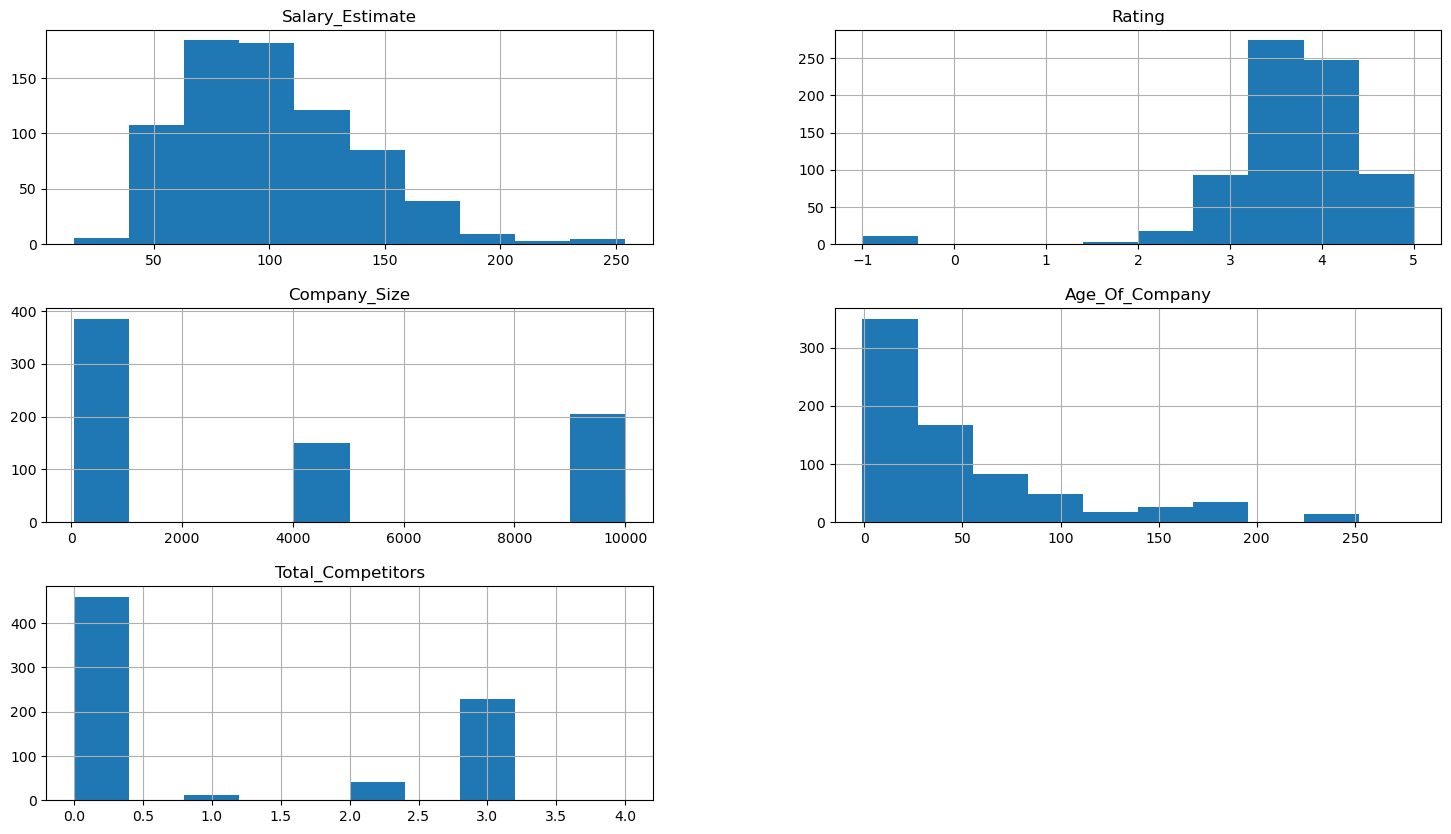

In [464]:
Data_For_ML.hist(['Salary_Estimate','Rating','Company_Size','Age_Of_Company','Total_Competitors'], figsize=(18,10))

In [465]:
Data_For_ML['Age_Of_Company'].median()

28.0

In [466]:
Data_For_ML['Rating'][Data_For_ML['Rating']==-1] = 2.5 # replacing null rating with min rating
Data_For_ML['Age_Of_Company'][Data_For_ML['Age_Of_Company']>=100] = 28 # replacing with median

C:\Users\koont\AppData\Local\Temp\ipykernel_19016\1063882699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_For_ML['Rating'][Data_For_ML['Rating']==-1] = 2.5 # replacing null rating with min rating
C:\Users\koont\AppData\Local\Temp\ipykernel_19016\1063882699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_For_ML['Age_Of_Company'][Data_For_ML['Age_Of_Company']>=100] = 28 # replacing with median


array([[<Axes: title={'center': 'Salary_Estimate'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Company_Size'}>,
        <Axes: title={'center': 'Age_Of_Company'}>]], dtype=object)

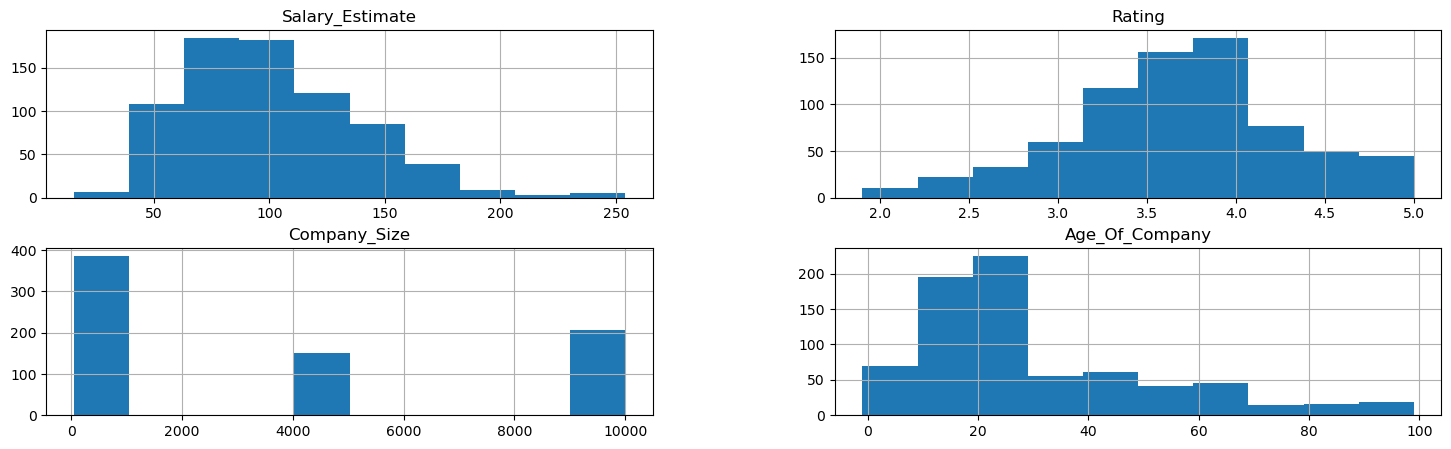

In [467]:
Data_For_ML.hist(['Salary_Estimate','Rating','Company_Size','Age_Of_Company'], figsize=(18,5))

In [468]:

ContinuousCols = ['Salary_Estimate','Total_Competitors','Company_Size','Rating','Age_Of_Company']

corrdata = Data_For_ML[ContinuousCols].corr()

corrdata['Salary_Estimate'][abs(corrdata['Salary_Estimate'])>0.05]


Salary_Estimate      1.000000
Total_Competitors    0.082339
Company_Size         0.050244
Rating               0.099405
Age_Of_Company      -0.157623
Name: Salary_Estimate, dtype: float64

In [469]:
Data_For_ML.columns

Index(['Per_Hour_Salary', 'Employer_Salary', 'Min_Salary', 'Max_Salary',
       'Salary_Estimate', 'Company_Name', 'Area', 'State', 'HQ_Area',
       'HQ_State', 'Job_In_Headquater', 'Title', 'Position', 'Age_Of_Company',
       'Job_Description', 'Experienced', 'Degree_Holder', 'Communication',
       'Visualization', 'Machine_learning', 'Responsibilities', 'SQL',
       'Python', 'Spark', 'AWS', 'Excel', 'Total_Competitors', 'Company_Size',
       'Rating', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue'],
      dtype='object')

Ref:[
'Company_Name','Area','State','Title','Position','Degree_Holder','Machine_learning','Python','Spark','AWS',
 'Excel','Per_Hour_Salary','Employer_Salary','Type_of_ownership','Industry','Sector','Revenue']
 Total_Competitors    0.082339
Company_Size         0.050244
Rating               0.099405
Age_Of_Company      -0.157623

In [470]:
UselessColumns = ['SQL','Responsibilities','Visualization','Communication','Experienced','Job_In_Headquater','Min_Salary','Max_Salary']
Cleaned_Data_For_ML = Data_For_ML.drop(UselessColumns,axis=1)
Cleaned_Data_For_ML.columns


Index(['Per_Hour_Salary', 'Employer_Salary', 'Salary_Estimate', 'Company_Name',
       'Area', 'State', 'HQ_Area', 'HQ_State', 'Title', 'Position',
       'Age_Of_Company', 'Job_Description', 'Degree_Holder',
       'Machine_learning', 'Python', 'Spark', 'AWS', 'Excel',
       'Total_Competitors', 'Company_Size', 'Rating', 'Type_of_ownership',
       'Industry', 'Sector', 'Revenue'],
      dtype='object')

# EDA

Scatter Plot

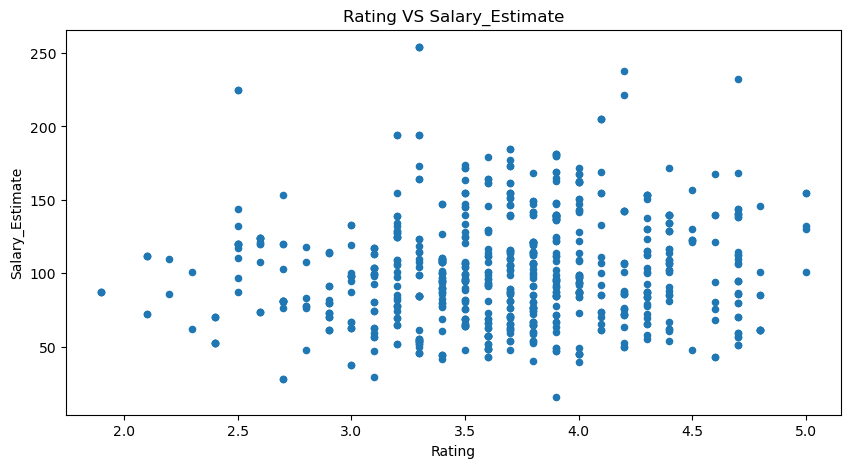

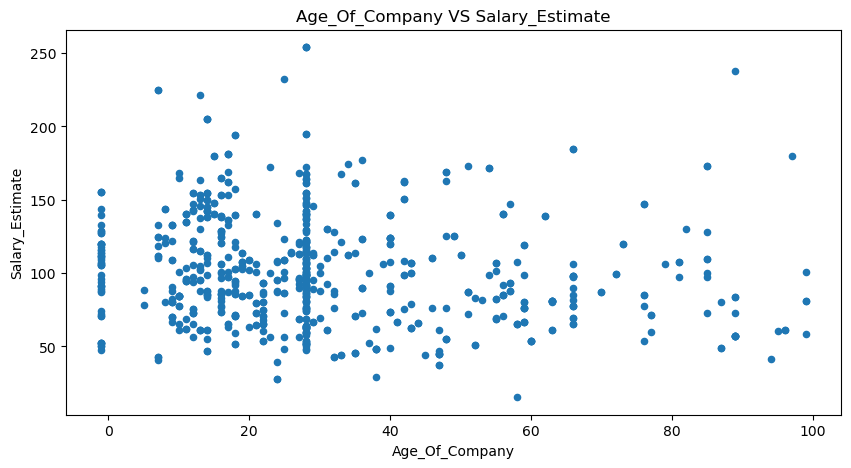

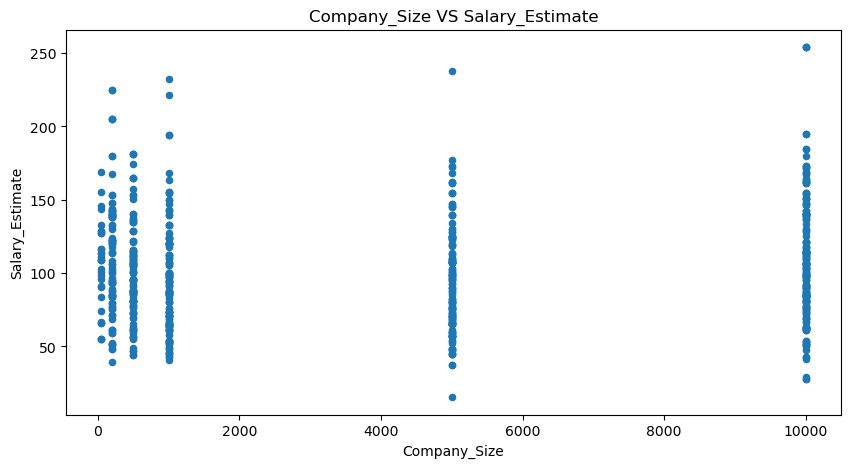

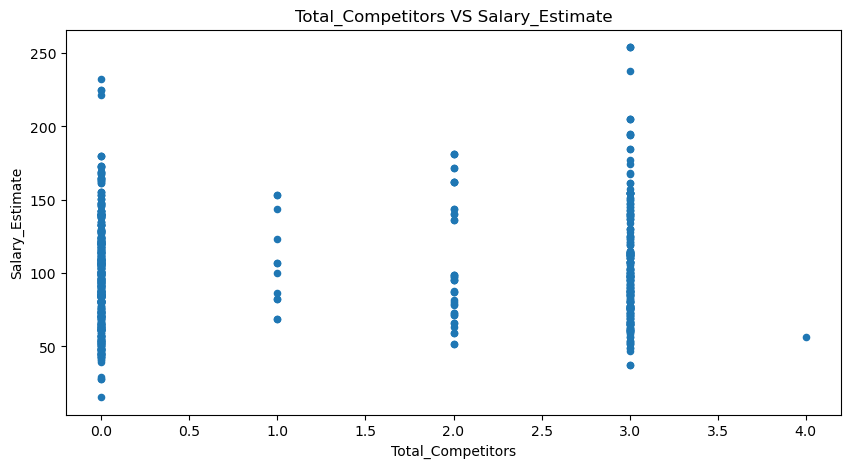

In [471]:
ContinuousCols=['Rating','Age_Of_Company','Company_Size','Total_Competitors']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    Cleaned_Data_For_ML.plot.scatter(x=predictor, y='Salary_Estimate', figsize=(10,5), title=predictor+" VS "+ 'Salary_Estimate')

In [472]:
#by looking at the graph i am shifting company size and total competitor to categorical group
Cleaned_Data_For_ML.columns

Index(['Per_Hour_Salary', 'Employer_Salary', 'Salary_Estimate', 'Company_Name',
       'Area', 'State', 'HQ_Area', 'HQ_State', 'Title', 'Position',
       'Age_Of_Company', 'Job_Description', 'Degree_Holder',
       'Machine_learning', 'Python', 'Spark', 'AWS', 'Excel',
       'Total_Competitors', 'Company_Size', 'Rating', 'Type_of_ownership',
       'Industry', 'Sector', 'Revenue'],
      dtype='object')

In [473]:
company_size_to_category = pd.cut(Cleaned_Data_For_ML.Company_Size,bins=[0,2000,4000,10000],labels=['Small','Mid','Large'])
Cleaned_Data_For_ML.insert(19,'Company_Size_Sorted',company_size_to_category)
competitor_to_category = pd.cut(Cleaned_Data_For_ML.Total_Competitors,bins=[-1,2,3,4],labels=['Less','Average','Huge'])
Cleaned_Data_For_ML.insert(18,'Competitor_Sorted',competitor_to_category)
Cleaned_Data_For_ML.columns

Index(['Per_Hour_Salary', 'Employer_Salary', 'Salary_Estimate', 'Company_Name',
       'Area', 'State', 'HQ_Area', 'HQ_State', 'Title', 'Position',
       'Age_Of_Company', 'Job_Description', 'Degree_Holder',
       'Machine_learning', 'Python', 'Spark', 'AWS', 'Excel',
       'Competitor_Sorted', 'Total_Competitors', 'Company_Size_Sorted',
       'Company_Size', 'Rating', 'Type_of_ownership', 'Industry', 'Sector',
       'Revenue'],
      dtype='object')

In [474]:
Cleaned_Data_For_ML.head(10)

,Per_Hour_Salary,Employer_Salary,Salary_Estimate,Company_Name,Area,State,HQ_Area,HQ_State,Title,Position,...,Excel,Competitor_Sorted,Total_Competitors,Company_Size_Sorted,Company_Size,Rating,Type_of_ownership,Industry,Sector,Revenue
0,0,0,72.0,Tecolote Research,Albuquerque,NM,Goleta,CA,data scientist,junior,...,1,Less,0,Small,1000,3.8,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD)
1,0,0,87.5,University of Maryland Medical System,Linthicum,MD,Baltimore,MD,data scientist,junior,...,0,Less,0,Large,10000,3.4,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD)
2,0,0,85.0,KnowBe4,Clearwater,FL,Clearwater,FL,data scientist,junior,...,1,Less,0,Small,1000,4.8,Company - Private,Security Services,Business Services,$100 to $500 million (USD)
3,0,0,76.5,PNNL,Richland,WA,Richland,WA,data scientist,junior,...,0,Average,3,Large,5000,3.8,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,0,0,114.5,Affinity Solutions,New York,NY,New York,NY,data scientist,junior,...,1,Average,3,Small,200,2.9,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
5,0,0,95.0,CyrusOne,Dallas,TX,Dallas,TX,data scientist,junior,...,1,Average,3,Small,500,3.4,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD)
6,0,0,73.5,ClearOne Advantage,Baltimore,MD,Baltimore,MD,data scientist,junior,...,1,Less,0,Small,1000,4.1,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable
7,0,0,114.0,Logic20/20,San Jose,CA,Seattle,WA,data scientist,junior,...,1,Less,0,Small,500,3.8,Company - Private,Consulting,Business Services,$25 to $50 million (USD)
8,0,0,61.0,Rochester Regional Health,Rochester,NY,Rochester,NY,data scientist,junior,...,0,Less,0,Large,10000,3.3,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD)
9,0,0,140.0,<intent>,New York,NY,New York,NY,data scientist,junior,...,0,Less,2,Small,200,4.6,Company - Private,Internet,Information Technology,$100 to $500 million (USD)


box plot 

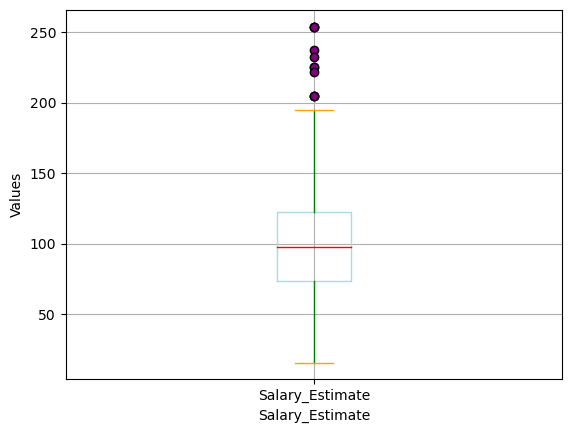

In [475]:
import matplotlib.pyplot as plt
ax = Cleaned_Data_For_ML.boxplot(column=['Salary_Estimate'], boxprops=dict(color='lightblue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

ax.set_xlabel('Salary_Estimate')
ax.set_ylabel('Values')

plt.show()

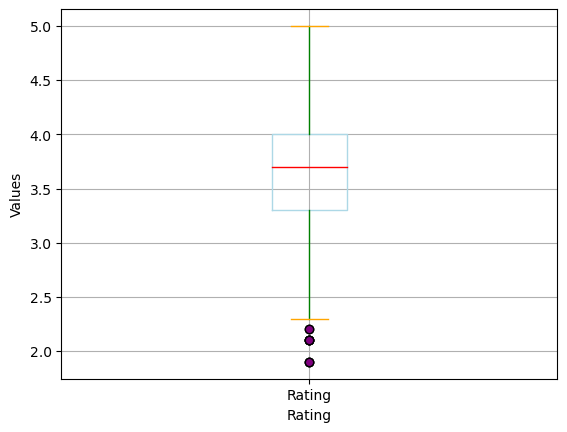

In [476]:
ax = Cleaned_Data_For_ML.boxplot(column=['Rating'], boxprops=dict(color='lightblue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

ax.set_xlabel('Rating')
ax.set_ylabel('Values')


plt.show()

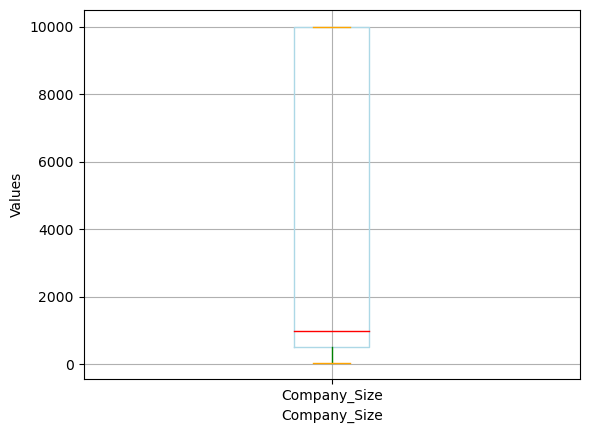

In [477]:
ax = Cleaned_Data_For_ML.boxplot(column=['Company_Size'], boxprops=dict(color='lightblue'), 
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

ax.set_xlabel('Company_Size')
ax.set_ylabel('Values')

plt.show()

Correlation

In [478]:
ContinuousCols = ['Salary_Estimate','Rating','Age_Of_Company']

corrdata = Cleaned_Data_For_ML[ContinuousCols].corr()

corrdata['Salary_Estimate'][abs(corrdata['Salary_Estimate'])>0.05]

Salary_Estimate    1.000000
Rating             0.099405
Age_Of_Company    -0.157623
Name: Salary_Estimate, dtype: float64

<Axes: >

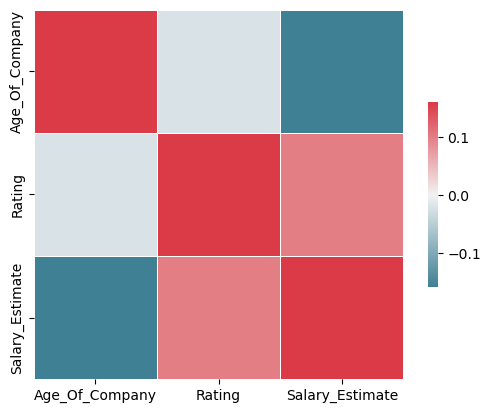

In [479]:
import seaborn as sns
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(Cleaned_Data_For_ML[['Age_Of_Company', 'Rating', 'Salary_Estimate']].corr(), vmax=0.16,  center=0, cmap=cmap,
           square=True, linewidths=0.5, cbar_kws = {'shrink': .5})

In [480]:
Cleaned_Data_For_ML.columns

Index(['Per_Hour_Salary', 'Employer_Salary', 'Salary_Estimate', 'Company_Name',
       'Area', 'State', 'HQ_Area', 'HQ_State', 'Title', 'Position',
       'Age_Of_Company', 'Job_Description', 'Degree_Holder',
       'Machine_learning', 'Python', 'Spark', 'AWS', 'Excel',
       'Competitor_Sorted', 'Total_Competitors', 'Company_Size_Sorted',
       'Company_Size', 'Rating', 'Type_of_ownership', 'Industry', 'Sector',
       'Revenue'],
      dtype='object')

Graph for Title: Total = 3
Graph for Company_Name: Total = 20
Graph for Area: Total = 20
Graph for Type_of_ownership: Total = 11
Graph for Industry: Total = 20
Graph for Sector: Total = 20


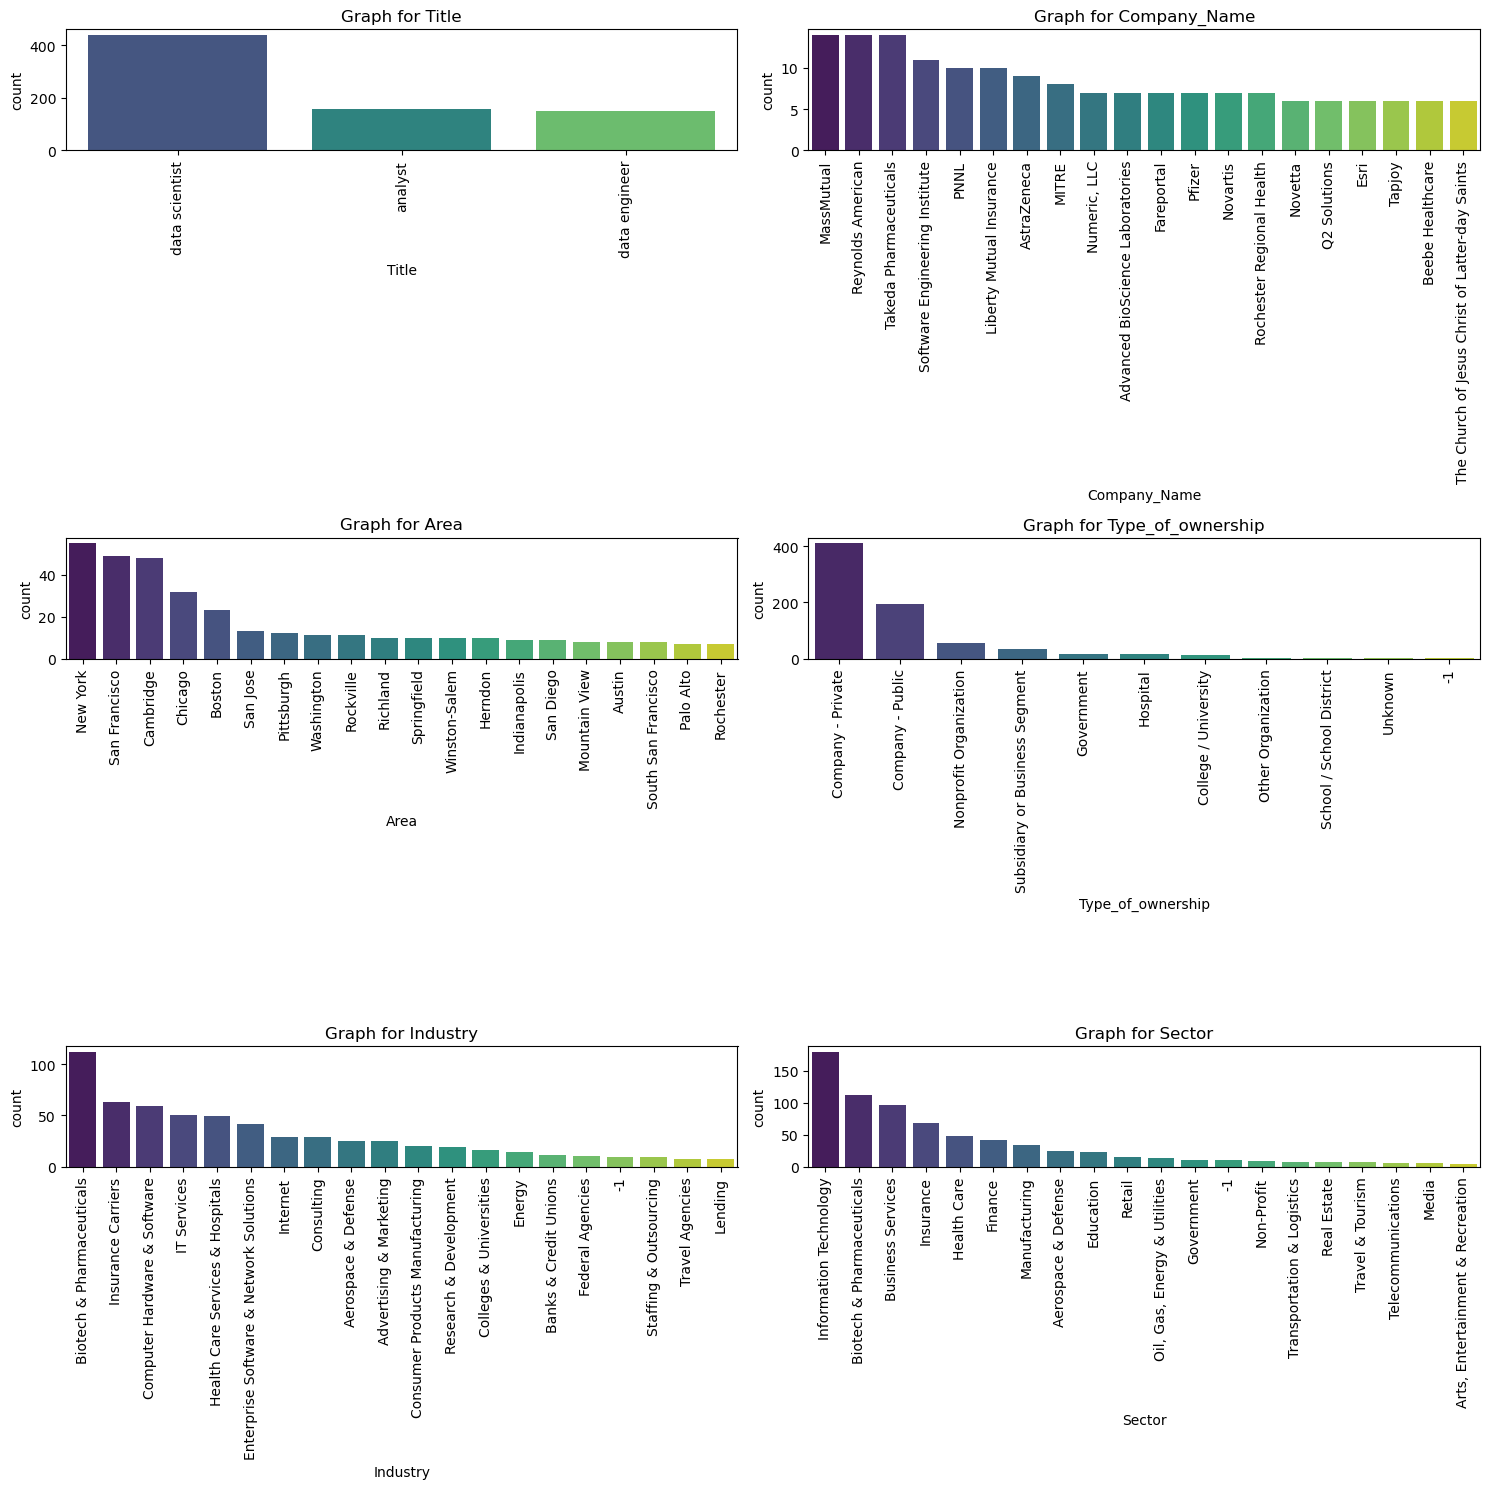

In [481]:
import matplotlib.pyplot as plt
# columns to plot
columns_to_plot = ['Title','Company_Name', 'Area', 'Type_of_ownership','Industry','Sector']

# Calculate the number of rows needed for subplots
num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2

# Create subplots with appropriate number of rows and columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over selected columns in df_cat
for i, col in enumerate(columns_to_plot):
    # Get value counts for the current column
    cat_num = Cleaned_Data_For_ML[col].value_counts()[:20]
    print("Graph for %s: Total = %d" % (col, len(cat_num)))
    
    # Create a bar plot only if there are values to plot
    if not cat_num.empty:
        # Create a bar plot
        chart = sns.barplot(x=cat_num.index, y=cat_num, palette='viridis', ax=axes[i])
        
        # Rotate x-axis labels for better readability
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        
        # Set title for the subplot
        axes[i].set_title("Graph for %s" % col)
    else:
        # Remove the subplot if there are no values to plot
        fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [482]:
pd.pivot_table(Cleaned_Data_For_ML, index=['Title','Position'], values= 'Salary_Estimate')

Salary_Estimate
Title          Position                 
analyst        junior          78.270161
               senior          82.795484
data engineer  junior          98.154206
               senior         120.261905
data scientist junior          97.358557
               senior         130.309524

In [483]:
pd.set_option('display.max_rows',None)
pd.pivot_table(Cleaned_Data_For_ML, index=['Area','Title'], values= 'Salary_Estimate')

,,Salary_Estimate
Area,Title,
Agoura Hills,data engineer,101.000000
Alabaster,data scientist,39.500000
Alameda,data scientist,93.750000
Albuquerque,data scientist,74.333333
Alexandria,analyst,71.000000
Aliso Viejo,data engineer,113.000000
Allendale,data scientist,82.500000
Allentown,analyst,127.500000
Ann Arbor,data scientist,130.000000


Get Dummies

In [484]:


# Category_Col_List = ['Company_Name',
#  'Area',
#  'State',
#  'HQ_Area',
#  'HQ_State',
#  'Title',
#  'Position',
#  'Degree_Holder',
#  'Machine_learning',
#  'Python',
#  'Spark',
#  'AWS',
#  'Excel',
#  'Per_Hour_Salary',
#  'Employer_Salary',
#  'Type_of_ownership',
#  'Industry',
#  'Sector',
#  'Revenue','Competitor_Sorted','Company_Size_Sorted']

# Continuous_Col_List =  ['Salary_Estimate','Rating','Age_Of_Company']
# Selecter_Col = ['Title']

#Cleaned_Data_For_ML_Cat = Cleaned_Data_For_ML[Category_Col_List]
Scientist_Dummy  = pd.get_dummies(Cleaned_Data_For_ML[Cleaned_Data_For_ML['Title'] == 'data scientist'])

#Scientist_Dummy  = pd.get_dummies(Cleaned_Data_For_ML_Cat[Cleaned_Data_For_ML_Cat['Title'] == 'data scientist'])
# Analyst_Dummy = pd.get_dummies(Cleaned_Data_For_ML_Cat[Cleaned_Data_For_ML_Cat['Title'] == 'analyst'])
# Engineer_Dummy = pd.get_dummies(Cleaned_Data_For_ML_Cat[Cleaned_Data_For_ML_Cat['Title'] == 'data engineer'])
# pd.set_option('display.max_rows',None)

#converting all boolean into true and false
Scientist_Dummy = Scientist_Dummy.astype(int)
# Analyst_Dummy = Analyst_Dummy.astype(int)
# Engineer_Dummy = Engineer_Dummy.astype(int)

    
#Adding Continuous 
#Scientist_Dummy[Continuous_Col_List] =Cleaned_Data_For_ML[Continuous_Col_List].where(Cleaned_Data_For_ML['Title']=='data scientist')
# Analyst_Dummy[Continuous_Col_List] = Cleaned_Data_For_ML[Continuous_Col_List].where(Cleaned_Data_For_ML['Title']=='analyst')
# Engineer_Dummy[Continuous_Col_List] = Cleaned_Data_For_ML[Continuous_Col_List].where(Cleaned_Data_For_ML['Title']=='data engineer')

# Adding Original Job Description

#Scientist_Dummy['Job_Description'] = Cleaned_Data_For_ML['Job_Description'].where(Cleaned_Data_For_ML['Title']=='data scientist')
# Analyst_Dummy['Job_Description'] = Cleaned_Data_For_ML['Job_Description'].where(Cleaned_Data_For_ML['Title']=='analyst')
# Engineer_Dummy['Job_Description'] = Cleaned_Data_For_ML['Job_Description'].where(Cleaned_Data_For_ML['Title']=='data engineer')

print(Scientist_Dummy.shape)
# print(Analyst_Dummy.shape)
# print(Engineer_Dummy.shape)
Cleaned_Data_For_ML.Title.value_counts()

(438, 927)


Title
data scientist    438
analyst           155
data engineer     149
Name: count, dtype: int64

In [489]:
Scientist_Dummy.head(10)
#print(Scientist_Dummy.isnull().sum())

,Per_Hour_Salary,Employer_Salary,Salary_Estimate,Age_Of_Company,Degree_Holder,Machine_learning,Python,Spark,AWS,Excel,...,Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable
0,0,0,72,51,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,87,40,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,85,14,1,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,76,59,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,114,26,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,95,24,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,73,16,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,0,0,114,19,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
8,0,0,61,10,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,140,15,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


# Splitting the data into Training and Testing sample

In [491]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
TargetVariable='Salary_Estimate'

#Scientist
X_Sci= Scientist_Dummy.drop(TargetVariable, axis=1).values
y_Sci= Scientist_Dummy[TargetVariable].values


#PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
# Finding and storing Min and Max values for every column in X
#PredictorScalerFit=PredictorScaler.fit(X_Sci)

# Generating the standardized values of X
#X_Sci=PredictorScalerFit.transform(X_Sci)


X_train_Sci,X_test_Sci,y_train_Sci,y_test_Sci = train_test_split(X_Sci,y_Sci,test_size=0.25, random_state=42)
print(X_train_Sci[0:4])
# #Analyst
# X_Ana = Analyst_Dummy.drop(TargetVariable, axis=1)
# y_Ana = Analyst_Dummy[TargetVariable].values
# X_train_Ana,X_test_Ana,y_train_Ana,y_test_Ana = train_test_split(X_Ana,y_Ana,test_size=0.25, random_state=42)

# #Engineer
# X_Engg = Engineer_Dummy.drop(TargetVariable, axis=1)
# y_Engg = Engineer_Dummy[TargetVariable].values
# X_train_Engg,X_test_Engg,y_train_Engg,y_test_Engg = train_test_split(X_Engg,y_Engg,test_size=0.25, random_state=42)



# Quick check on the shapes of scientist train and test
print(X_train_Sci.shape)
print(y_train_Sci.shape)
print(X_test_Sci.shape)
print(y_test_Sci.shape)


# # Quick check on the shapes of Analyst train and test
# print(X_train_Ana.shape)
# print(y_train_Ana.shape)
# print(X_test_Ana.shape)
# print(y_test_Ana.shape)


# # Quick check on the shapes of Engineer train and test
# print(X_train_Engg.shape)
# print(y_train_Engg.shape)
# print(X_test_Engg.shape)
# print(y_test_Engg.shape)



#Predictors_Sci = Scientist_Dummy.drop(TargetVariable, axis=1).columns.values

#Predictors_Sci

[[ 0  0 19 ...  0  0  1]
 [ 0  0 59 ...  0  0  0]
 [ 0  0 12 ...  0  0  1]
 [ 0  0 73 ...  0  0  0]]
(328, 926)
(328,)
(110, 926)
(110,)


# # Linear Regression (For Scientist)

In [492]:

from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train_Sci,y_train_Sci)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train_Sci, LREG.predict(X_train_Sci)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test_Sci)
TestingDataResults=pd.DataFrame(data=X_test_Sci, columns=Predictors_Sci)
TestingDataResults[TargetVariable]=y_test_Sci
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
#print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['PredictedSalary_Estimate']))/TestingDataResults[TargetVariable])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_Sci , y_Sci, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
   Salary_Estimate  PredictedSalary_Estimate        APE
0              172                      90.0  47.674419
1               97                      61.0  37.113402
2               76                      83.0   9.210526
3               86                     110.0  27.906977
4               73                      73.0   0.000000
Mean Accuracy on test data: 88.92196895181061
Median Accuracy on test data: 100.0

Accuracy values for 10-fold Cross Validation:
 [ 96.85761771  88.09835581  89.66390248  79.94367674  93.99999872
 100.          89.84583679  97.1078759   92.34849579  95.1093546 ]

Final Average Accuracy of the model: 92.3


# Random Forest  (For Scientist)

RandomForestRegressor(criterion='friedman_mse', max_depth=10)
R2 Value: 0.9119491987263546

##### Model Validation and Accuracy Calculations ##########
   Salary_Estimate  PredictedSalary_Estimate
0              172                     100.0
1               97                      79.0
2               76                      94.0
3               86                     108.0
4               73                      91.0
Mean Accuracy on test data: 85.00794312110538
Median Accuracy on test data: 89.18831168831169

Accuracy values for 10-fold Cross Validation:
 [88.39521579 82.14371483 84.04251282 76.56763088 90.48911976 90.60949175
 85.62196357 87.89674915 87.13890468 89.69391967]

Final Average Accuracy of the model: 86.26


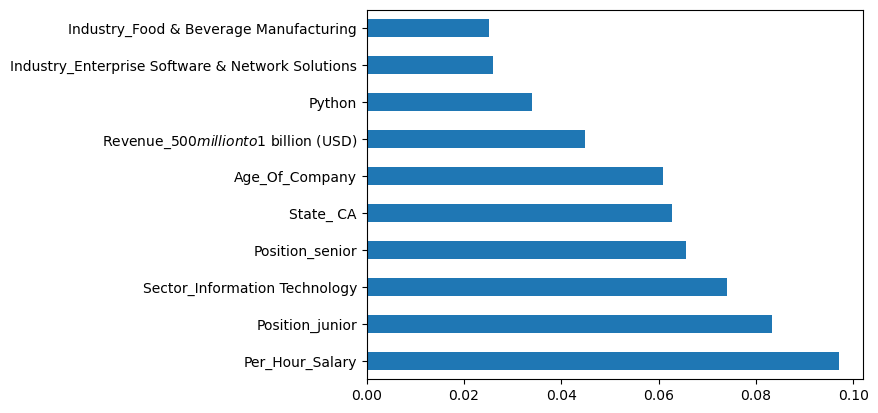

In [497]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train_Sci,y_train_Sci)
prediction=RF.predict(X_test_Sci)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train_Sci, RF.predict(X_train_Sci)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors_Sci)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test_Sci, columns=Predictors_Sci)
TestingDataResults[TargetVariable]=y_test_Sci
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults[TargetVariable]-TestingDataResults['PredictedSalary_Estimate']))/TestingDataResults[TargetVariable])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_Sci , y_Sci, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))